In [7]:
import os
import numpy as np
import pandas as pd

In [21]:
! pip install seaborn

In [27]:
! pip install statsmodels

  Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.8 MB 14.7 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.8 MB 17.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 17.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 16.6 MB/s eta 0:00:00


In [28]:
! pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 13.4 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.1 MB 17.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 17.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 15.8 MB/s eta 0:00:00


In [23]:
! pip install scipy

   ---------------------------------------- 0.0/43.9 MB ? eta -:--:--
   -- ------------------------------------- 2.9/43.9 MB 15.2 MB/s eta 0:00:03
   ------ --------------------------------- 6.8/43.9 MB 16.8 MB/s eta 0:00:03
   ---------- ----------------------------- 11.0/43.9 MB 17.6 MB/s eta 0:00:02
   ------------- -------------------------- 14.9/43.9 MB 17.7 MB/s eta 0:00:02
   ---------------- ----------------------- 18.6/43.9 MB 17.5 MB/s eta 0:00:02
   ------------------- -------------------- 21.5/43.9 MB 17.0 MB/s eta 0:00:02
   ----------------------- ---------------- 26.2/43.9 MB 17.9 MB/s eta 0:00:01
   --------------------------- ------------ 30.4/43.9 MB 17.9 MB/s eta 0:00:01
   ------------------------------- -------- 34.3/43.9 MB 18.0 MB/s eta 0:00:01
   ---------------------------------- ----- 38.3/43.9 MB 18.0 MB/s eta 0:00:01
   -------------------------------------- - 42.2/43.9 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------  43.8/43.9 MB 18.1 M

In [3]:
df = pd.read_csv("data/flight_price.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- Look at the missing values
- Check Dtype of Date, Total_stops, Time columns

In [10]:
print(df.duplicated().sum()) # number of rows that have duplicates
df[df.duplicated(keep=False)] # all duplicate rows

220


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
49,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
73,Jet Airways,24/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819
81,Jet Airways,24/03/2019,Banglore,New Delhi,BLR → DEL,19:55,22:35,2h 40m,non-stop,No info,7229
87,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 07 Jun,18h 45m,2 stops,No info,13014
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


- Column-wise analysis and cleaning

In [11]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [13]:
df.select_dtypes("O").columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [27]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [28]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [29]:
df['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10683, dtype: object

In [47]:
df['Arrival_Time'].loc[lambda val: val.str.contains("^[0-9:]")].str.split(" ", n=1).str.get(1).unique() # values that are different from hr:min

array(['22 Mar', nan, '10 Jun', '13 Mar', '02 Mar', '10 May', '04 Mar',
       '13 Jun', '28 May', '19 Mar', '07 May', '02 Jun', '16 Jun',
       '19 May', '16 May', '28 Jun', '02 May', '28 Mar', '19 Jun',
       '04 Apr', '25 Mar', '07 Mar', '25 Jun', '07 Jun', '25 May',
       '13 May', '16 Mar', '22 May', '10 Apr', '04 Jun', '20 May',
       '28 Apr', '25 Apr', '10 Mar', '19 Apr', '13 Apr', '02 Apr',
       '23 Mar', '22 Apr', '11 May', '07 Apr', '03 May', '08 Mar',
       '03 Mar', '05 Mar', '22 Jun', '04 May', '26 May', '16 Apr',
       '26 Jun', '29 May', '29 Jun', '29 Mar', '23 May', '17 Jun'],
      dtype=object)

In [57]:
print(df["Duration"])
print(df["Duration"].loc[lambda val: val.str.contains("m")].nunique())
print(df["Duration"].loc[lambda val: ~val.str.contains("m")].nunique())
print(df["Duration"].loc[lambda val: ~val.str.contains("h")].nunique())
print(df["Duration"].loc[lambda val: ~val.str.contains("h")])

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object
339
29
1
6474    5m
Name: Duration, dtype: object


In [59]:
df.iloc[6474] # Duration dosn't make sense, so we will drop the row

Airline                        Air India
Date_of_Journey                6/03/2019
Source                            Mumbai
Destination                    Hyderabad
Route              BOM → GOI → PNQ → HYD
Dep_Time                           16:50
Arrival_Time                       16:55
Duration                              5m
Total_Stops                      2 stops
Additional_Info                  No info
Price                              17327
Name: 6474, dtype: object

In [61]:
df["Duration"].drop(index=6474).str.split(" ")

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10678    [2h, 30m]
10679    [2h, 35m]
10680         [3h]
10681    [2h, 40m]
10682    [8h, 20m]
Name: Duration, Length: 10682, dtype: object

In [65]:
(
    df["Duration"].drop(index=6474) # drop illoical row
    .str.split(" ", expand=True) # split "hr" and "min" as dataframe
    .set_axis(["hour", "minute"], axis=1) # name columns
    .assign(
        hour=lambda df_1: (  # multiply "hr" by 60 to convert to mins after removing "h" and to int
            df_1
            .hour
            .str.replace("h", "")
            .astype(int)
            .mul(60)
        ),
        minute=lambda df_1: (   # impute no "m" values with 0 and remove "m" and convert to int
            df_1
            .minute
            .str.replace("m", "")
            .fillna("0")
            .astype(int)
        )
    )
.sum(axis=1) # add both values to convert the whole duration to minutes
)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Length: 10682, dtype: int64

In [66]:
def clean_duration(col):
    return (
    col
        .str.split(" ", expand=True) # split "hr" and "min" as dataframe
        .set_axis(["hour", "minute"], axis=1) # name columns
        .assign(
            hour=lambda df_1: (  # multiply "hr" by 60 to convert to mins after removing "h" and to int
                df_1
                .hour
                .str.replace("h", "")
                .astype(int)
                .mul(60)
            ),
            minute=lambda df_1: (   # impute no "m" values with 0 and remove "m" and convert to int
                df_1
                .minute
                .str.replace("m", "")
                .fillna("0")
                .astype(int)
            )
        )
    .sum(axis=1) # add both values to convert the whole duration to minutes
        )

In [76]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [86]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [98]:
def clean_data(df):
    return (
    df.drop(index=[6474])
    .drop_duplicates()   
    .assign(**{col: df[col].str.strip() for col in df.select_dtypes(include='O').columns}) # strip leading and trailing whitespaces
    .assign(Airline=lambda df_1: df_1["Airline"].str.replace("Premium economy", "").str.replace("Business", ""), # removing redundant airline names
    Date_of_Journey=lambda df_1: pd.to_datetime(df_1["Date_of_Journey"], dayfirst=True),      #change object to datetime  
    Dep_Time=lambda df_1: pd.to_datetime(df_1["Dep_Time"]).dt.time, # convert to pandas time format
    Arrival_Time=lambda df_1: pd.to_datetime(df_1["Arrival_Time"]).dt.time, # convert to pandas time format
    Duration=lambda df_1: clean_duration(df_1["Duration"]),
    Total_Stops=lambda df_1: (df_1["Total_Stops"].replace("non-stop", "0").str.replace(" stops?", "", regex=True).pipe(lambda val: pd.to_numeric(val))), #convert values to int after removing "stop", "stops"
    Additional_Info=lambda df_1: df_1["Additional_Info"].replace("No info", "No Info") # Make these two categories as one
           ).drop(columns="Route") # drop redundant column     
    )

- The following are implemented to test after each step above in clean_data

In [25]:
clean_data(df)["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Vistara ',
       'Jet Airways ', 'Multiple carriers ', 'Trujet'], dtype=object)

In [26]:
clean_data(df)["Date_of_Journey"].dtypes

dtype('<M8[ns]')

In [35]:
clean_data(df)['Dep_Time']

0        22:20:00
1        05:50:00
2        09:25:00
3        18:05:00
4        16:50:00
           ...   
10678    19:55:00
10679    20:45:00
10680    08:20:00
10681    11:30:00
10682    10:55:00
Name: Dep_Time, Length: 10683, dtype: object

In [50]:
clean_data(df)['Arrival_Time']

0        01:10:00
1        13:15:00
2        04:25:00
3        23:30:00
4        21:35:00
           ...   
10678    22:25:00
10679    23:20:00
10680    11:20:00
10681    14:10:00
10682    19:15:00
Name: Arrival_Time, Length: 10683, dtype: object

In [93]:
clean_data(df)["Additional_Info"].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [82]:
clean_data(df)["Total_Stops"].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [99]:
clean_data(df)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20:00,01:10:00,170,0.0,No Info,3897
1,Air India,2019-05-01,Kolkata,Banglore,05:50:00,13:15:00,445,2.0,No Info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25:00,04:25:00,1140,2.0,No Info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05:00,23:30:00,325,1.0,No Info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50:00,21:35:00,285,1.0,No Info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,19:55:00,22:25:00,150,0.0,No Info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,20:45:00,23:20:00,155,0.0,No Info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20:00,11:20:00,180,0.0,No Info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,11:30:00,14:10:00,160,0.0,No Info,12648


- Split data for EDA

In [100]:
cleaned_data = clean_data(df)

In [101]:
X = cleaned_data.drop(columns="Price")
X

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20:00,01:10:00,170,0.0,No Info
1,Air India,2019-05-01,Kolkata,Banglore,05:50:00,13:15:00,445,2.0,No Info
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25:00,04:25:00,1140,2.0,No Info
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05:00,23:30:00,325,1.0,No Info
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50:00,21:35:00,285,1.0,No Info
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,19:55:00,22:25:00,150,0.0,No Info
10679,Air India,2019-04-27,Kolkata,Banglore,20:45:00,23:20:00,155,0.0,No Info
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20:00,11:20:00,180,0.0,No Info
10681,Vistara,2019-03-01,Banglore,New Delhi,11:30:00,14:10:00,160,0.0,No Info


In [102]:
y = cleaned_data['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [108]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(6695, 9) (6695,)
(1674, 9) (1674,)
(2093, 9) (2093,)


In [109]:
def export_data(X, y, name, path):
    file_name = f"{name}.csv"
    file_path = os.path.join(path, file_name)

    X.join(y).to_csv(file_path, index=False)    

In [111]:
export_data(X_train, y_train, "train", "data")

In [112]:
export_data(X_val, y_val, "val", "data")

In [113]:
export_data(X_test, y_test, "test", "data")

- EDA

In [8]:
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv("data/train.csv")
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,GoAir,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087


In [10]:
train.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Dep_Time            object
Arrival_Time        object
Duration             int64
Total_Stops        float64
Additional_Info     object
Price                int64
dtype: object

In [11]:
train["Date_of_Journey"] = pd.to_datetime(train["Date_of_Journey"], dayfirst=True)
train["Dep_Time"] = pd.to_datetime(train["Dep_Time"], dayfirst=True)
train["Arrival_Time"] = pd.to_datetime(train["Arrival_Time"], dayfirst=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10056\91923713.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  train["Date_of_Journey"] = pd.to_datetime(train["Date_of_Journey"], dayfirst=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10056\91923713.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train["Dep_Time"] = pd.to_datetime(train["Dep_Time"], dayfirst=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10056\91923713.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train["Arrival_Time"] = pd.to_datetime(train["Arrival_Time"], dayfirst=True)


In [12]:
train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops               float64
Additional_Info            object
Price                       int64
dtype: object

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          6695 non-null   object        
 1   Date_of_Journey  6695 non-null   datetime64[ns]
 2   Source           6695 non-null   object        
 3   Destination      6695 non-null   object        
 4   Dep_Time         6695 non-null   datetime64[ns]
 5   Arrival_Time     6695 non-null   datetime64[ns]
 6   Duration         6695 non-null   int64         
 7   Total_Stops      6694 non-null   float64       
 8   Additional_Info  6695 non-null   object        
 9   Price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [16]:
train.describe(include="number")

,Duration,Total_Stops,Price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [17]:
train.describe(include="O")

,Airline,Source,Destination,Additional_Info
count,6695,6695,6695,6695
unique,12,5,6,7
top,Jet Airways,Delhi,Cochin,No Info
freq,2386,2730,2730,5249


In [18]:
# we want total stops to be categorical as well, so we change its dtype and call describe
train["Total_Stops"] = train["Total_Stops"].astype("O")

In [19]:
train.describe(include="O")

,Airline,Source,Destination,Total_Stops,Additional_Info
count,6695,6695,6695,6694.0,6695
unique,12,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2386,2730,2730,3580.0,5249


In [30]:
import eda_utils # utils file to streamline eda workflow

In [32]:
eda_utils.missing_info(train)

,count,percentage
variable,,
Total_Stops,1,0.014937


In [38]:
train[train["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2534,Air India,2019-05-06,Delhi,Cochin,2025-02-03 09:45:00,2025-02-03 09:25:00,1420,NaN,No Info,7480


In [46]:
train[(train["Source"]=="Delhi") & (train["Destination"]=="Cochin") & (train["Airline"]=="Air India")]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
27,Air India,2019-05-27,Delhi,Cochin,2025-02-03 20:00:00,2025-02-03 19:15:00,1395,1.0,No Info,8372
55,Air India,2019-05-18,Delhi,Cochin,2025-02-03 03:50:00,2025-02-03 19:15:00,925,1.0,No Info,8879
61,Air India,2019-06-12,Delhi,Cochin,2025-02-03 13:00:00,2025-02-03 19:15:00,375,1.0,No Info,8372
72,Air India,2019-05-15,Delhi,Cochin,2025-02-03 17:20:00,2025-02-03 09:25:00,965,1.0,No Info,7480
84,Air India,2019-05-21,Delhi,Cochin,2025-02-03 17:15:00,2025-02-03 07:40:00,865,2.0,No Info,13039
...,...,...,...,...,...,...,...,...,...,...
6612,Air India,2019-03-27,Delhi,Cochin,2025-02-03 05:15:00,2025-02-03 06:50:00,1535,1.0,No Info,7165
6616,Air India,2019-05-24,Delhi,Cochin,2025-02-03 23:00:00,2025-02-03 19:15:00,1215,1.0,No Info,8582
6638,Air India,2019-03-27,Delhi,Cochin,2025-02-03 07:00:00,2025-02-03 19:15:00,735,1.0,No Info,6377
6642,Air India,2019-05-27,Delhi,Cochin,2025-02-03 14:25:00,2025-02-03 19:15:00,1730,2.0,No Info,13381


In [48]:
train[(train["Source"]=="Delhi") & (train["Destination"]=="Cochin") & (train["Airline"]=="Air India")]["Total_Stops"].unique()

array([1.0, 2.0, 0.0, 3.0, nan], dtype=object)

In [65]:
mode_val_total_stops = train[(train["Source"]=="Delhi") & (train["Destination"]=="Cochin") & (train["Airline"]=="Air India")]["Total_Stops"].mode()
mode_val_total_stops[0]

2.0

In [69]:
train["Total_Stops"].fillna(2.0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10056\3707835077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Total_Stops"].fillna(2.0, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10056\3707835077.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train["Total_Stops"].fillna(2.0, inplace=True

In [70]:
train.iloc[2534]

Airline                      Air India
Date_of_Journey    2019-05-06 00:00:00
Source                           Delhi
Destination                     Cochin
Dep_Time           2025-02-03 09:45:00
Arrival_Time       2025-02-03 09:25:00
Duration                          1420
Total_Stops                        2.0
Additional_Info                No Info
Price                             7480
Name: 2534, dtype: object

In [72]:
# outlier detection
from sklearn.ensemble import IsolationForest

In [73]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [75]:
# use isolation forest to have 1 or -1 for outliers or not for numeric columns
(  
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="Price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2025-02-03 18:55:00,2025-02-03 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,SpiceJet,2019-06-15,Mumbai,Hyderabad,2025-02-03 05:45:00,2025-02-03 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2025-02-03 23:05:00,2025-02-03 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,2025-02-03 14:05:00,2025-02-03 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2025-02-03 21:25:00,2025-02-03 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...
6687,Air India,2019-06-06,Kolkata,Banglore,2025-02-03 05:50:00,2025-02-03 08:55:00,1625,2.0,No Info,12723,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2025-02-03 21:25:00,2025-02-03 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,IndiGo,2019-03-03,Mumbai,Hyderabad,2025-02-03 09:10:00,2025-02-03 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2025-02-03 10:45:00,2025-02-03 18:50:00,1925,2.0,No Info,11093,-1


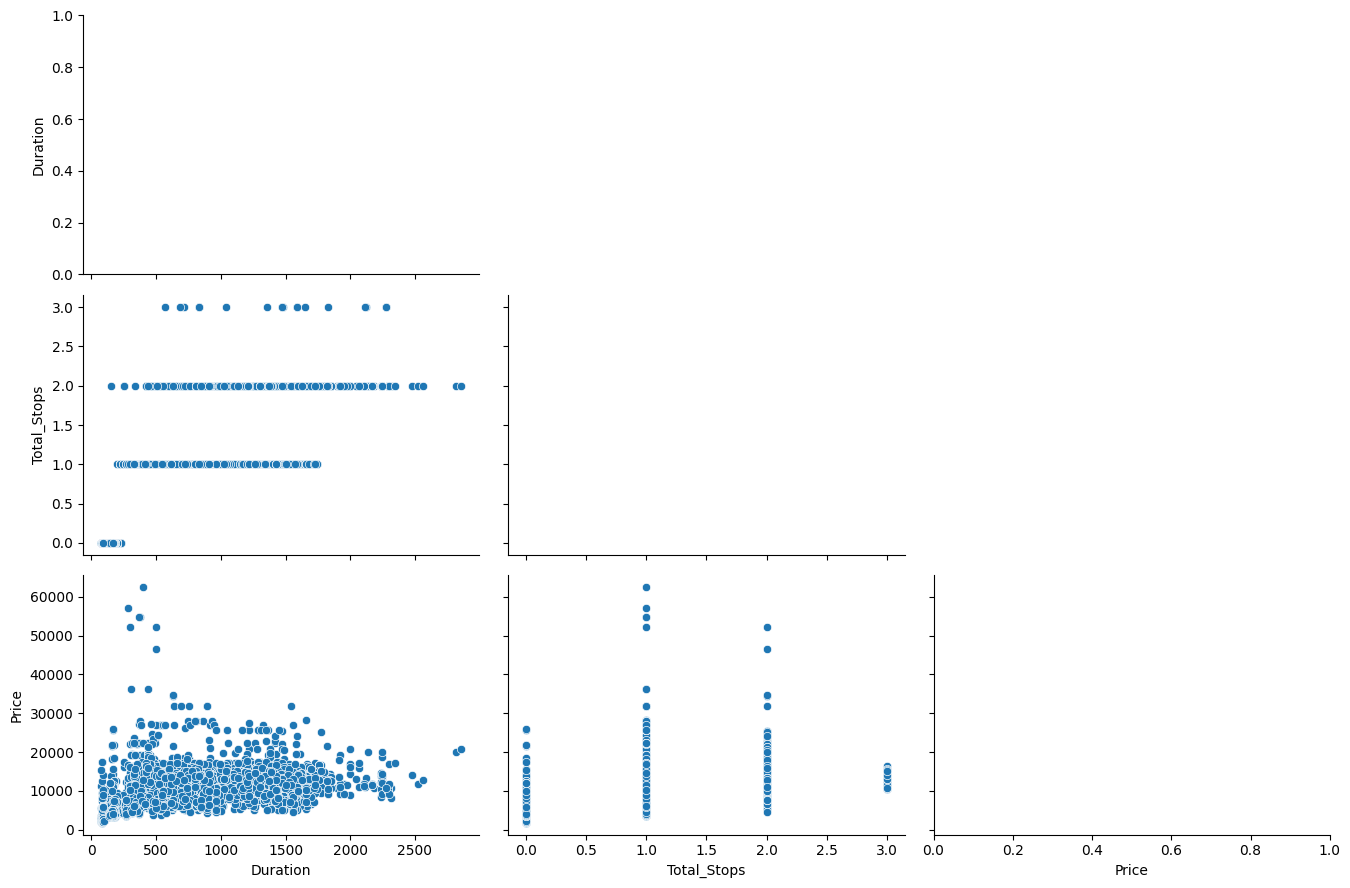

In [76]:
eda_utils.pair_plots(train)

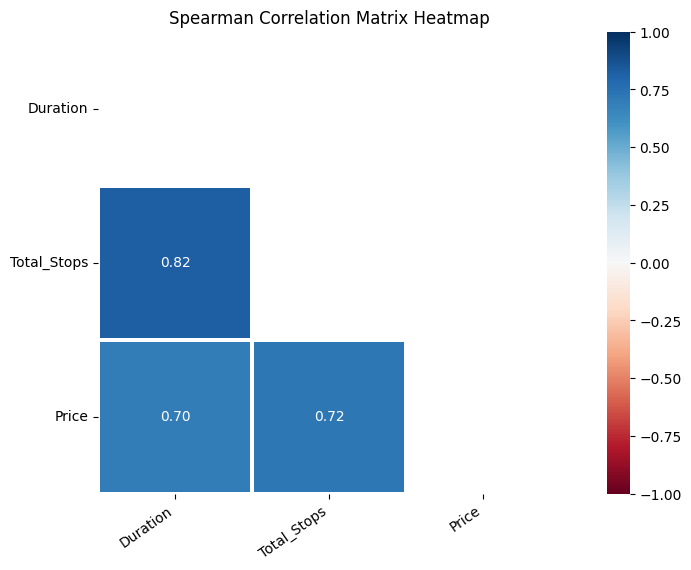

In [77]:
eda_utils.correlation_heatmap(train) 

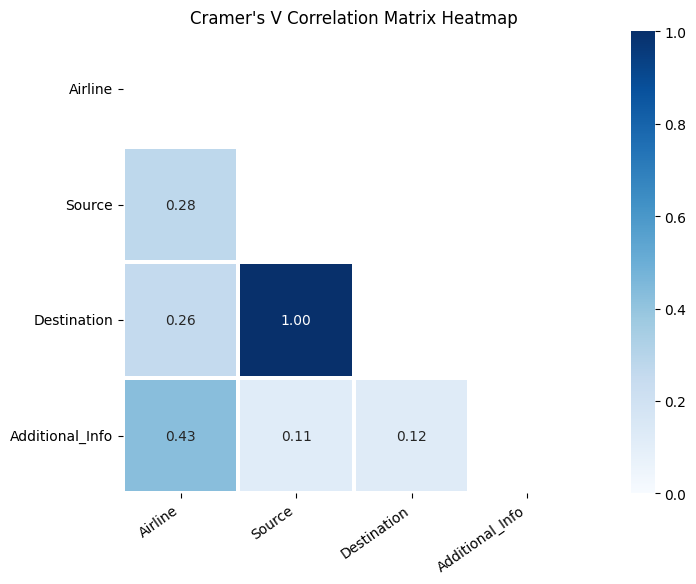

In [78]:
eda_utils.cramersV_heatmap(train) #categorical correlation

In [79]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [80]:
train["Airline"].unique()

array(['Jet Airways', 'GoAir', 'Air India', 'SpiceJet',
       'Multiple carriers', 'IndiGo', 'Vistara', 'Air Asia', 'Vistara ',
       'Multiple carriers ', 'Jet Airways ', 'Trujet'], dtype=object)

In [81]:
eda_utils.cat_summary(train, "Airline") # summary of categorical columns

0       Jet Airways
1       Jet Airways
2             GoAir
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: Airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 12 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,12
top,Jet Airways
freq,2386


,count,percentage
category,,
Jet Airways,2386,0.356385
IndiGo,1296,0.193577
Air India,1076,0.160717
Multiple carriers,730,0.109037
SpiceJet,537,0.080209
Vistara,319,0.047647
Air Asia,211,0.031516
GoAir,125,0.018671
Multiple carriers,6,0.000896


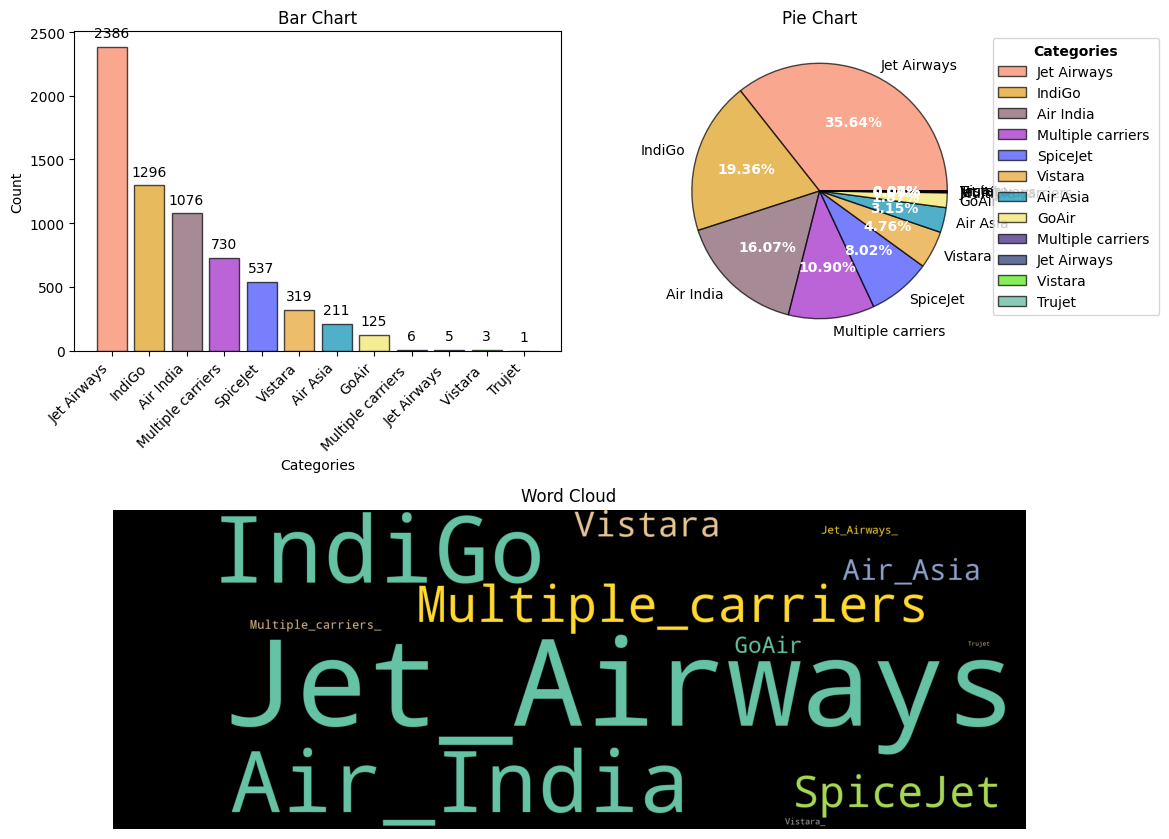

In [83]:
eda_utils.cat_univar_plots(train, "Airline")

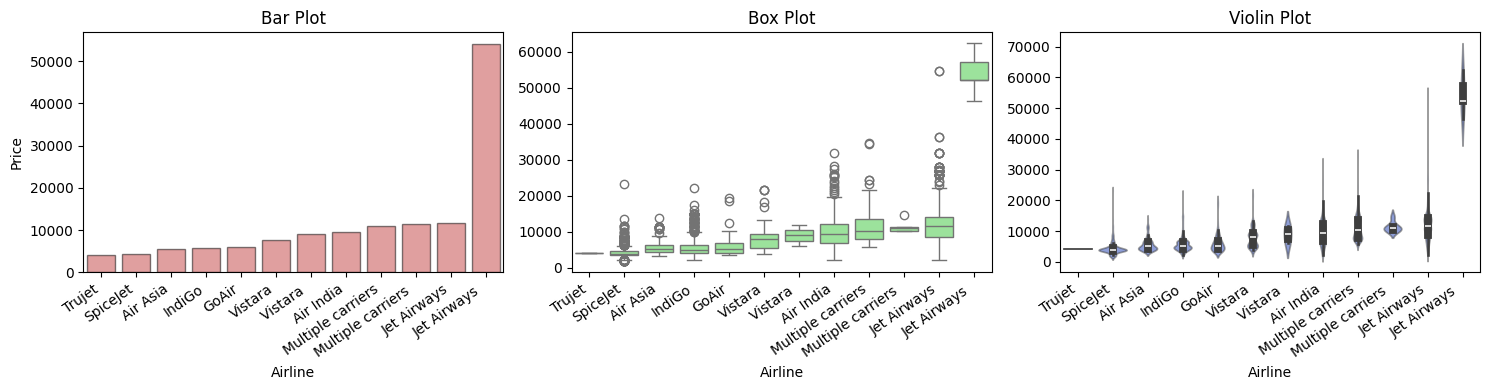

In [84]:
eda_utils.num_cat_bivar_plots(data=train, cat_var="Airline", num_var="Price")

In [85]:
eda_utils.num_cat_hyp_testing(train, "Price", "Airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 447.19740641380713
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Price and Airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3137.9739520926496
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Price and Airline are associated to each other


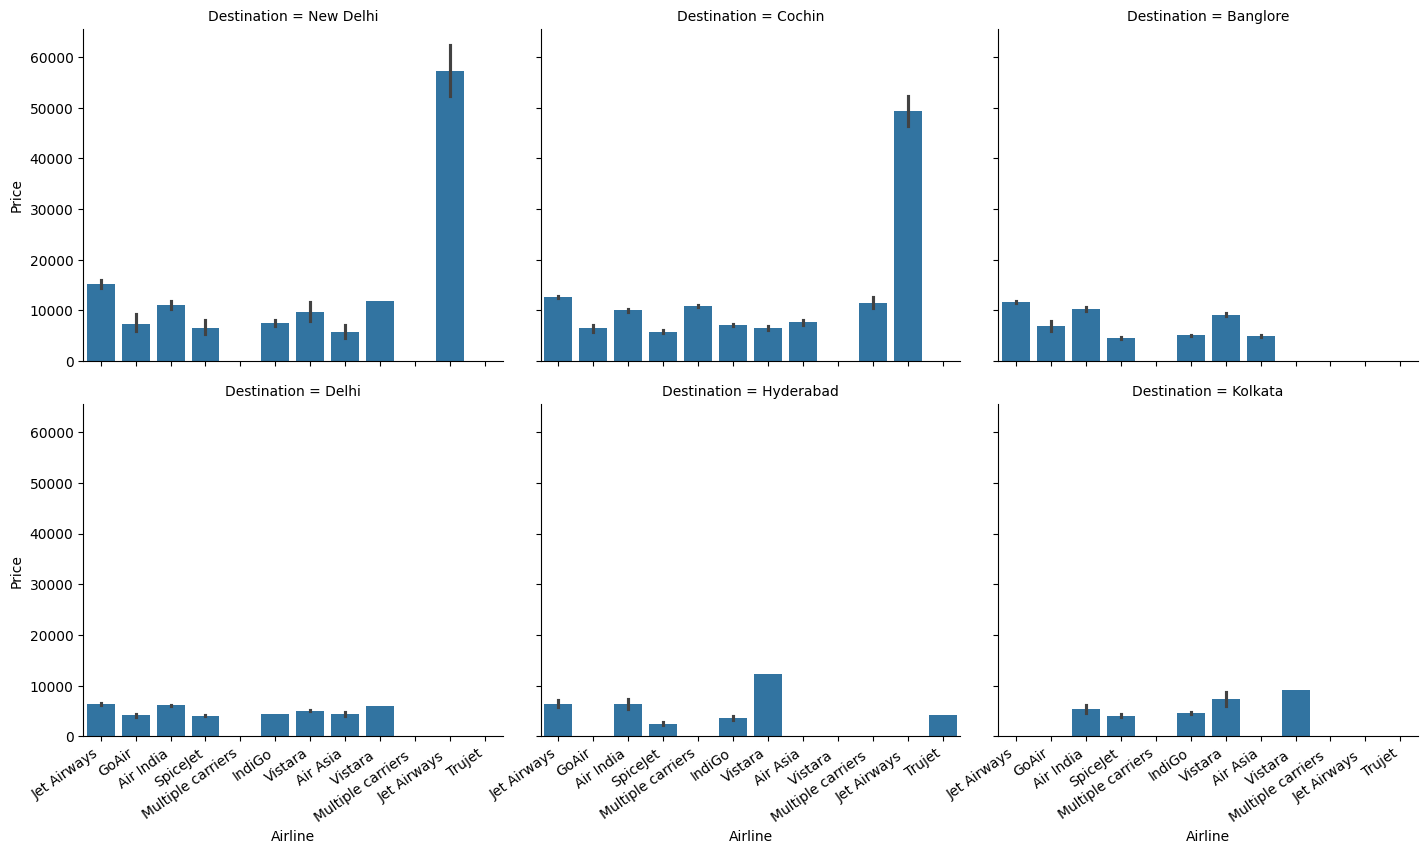

In [89]:
import seaborn as sns
airline_grid = sns.FacetGrid(
	data=train,
	col="Destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "Airline", "Price", order=train["Airline"].unique())

for ax in airline_grid.axes[3:]:
	eda_utils.rotate_xlabels(ax)

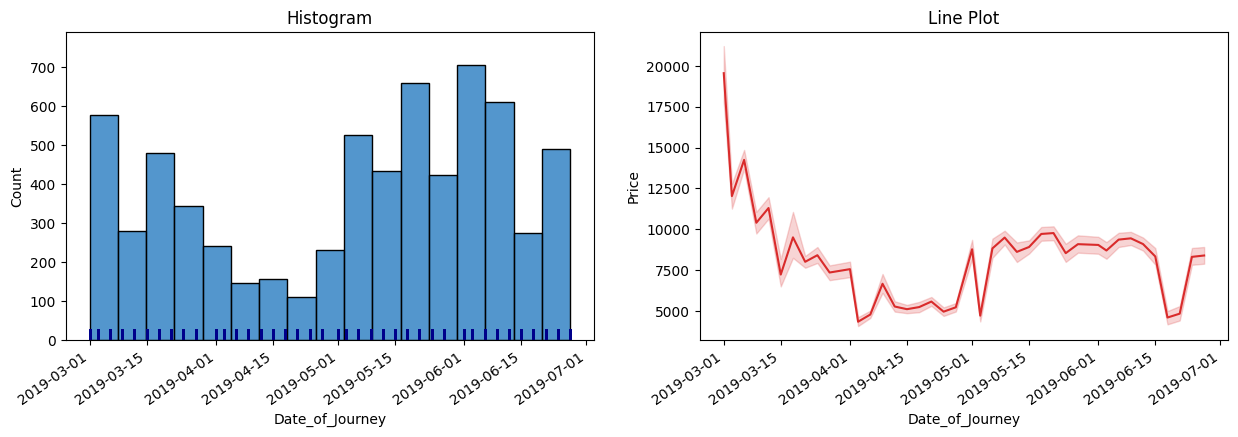

In [90]:
eda_utils.dt_univar_plots(data=train, var="Date_of_Journey", target="Price")

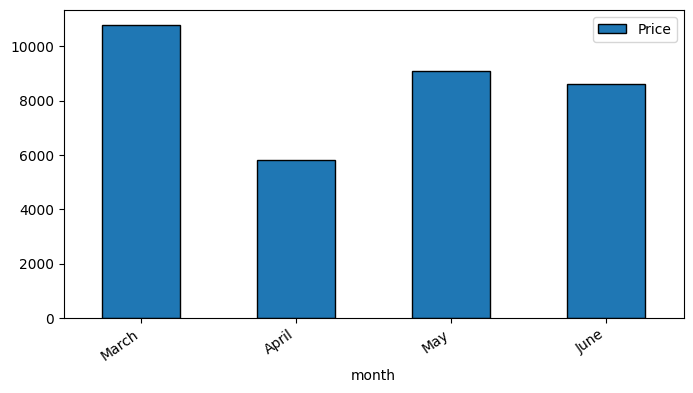

In [97]:
(    
	train
	.groupby(pd.Grouper(key="Date_of_Journey", freq="M"))["Price"].mean().to_frame().set_axis(["March", "April", "May", "June"], axis=0).rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_utils.rotate_xlabels(ax)

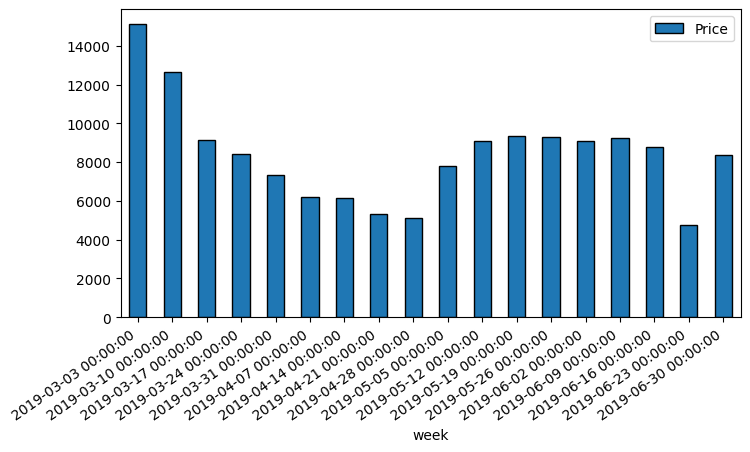

In [99]:
(    
	train
	.groupby(pd.Grouper(key="Date_of_Journey", freq="W"))["Price"].mean().to_frame().rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_utils.rotate_xlabels(ax)

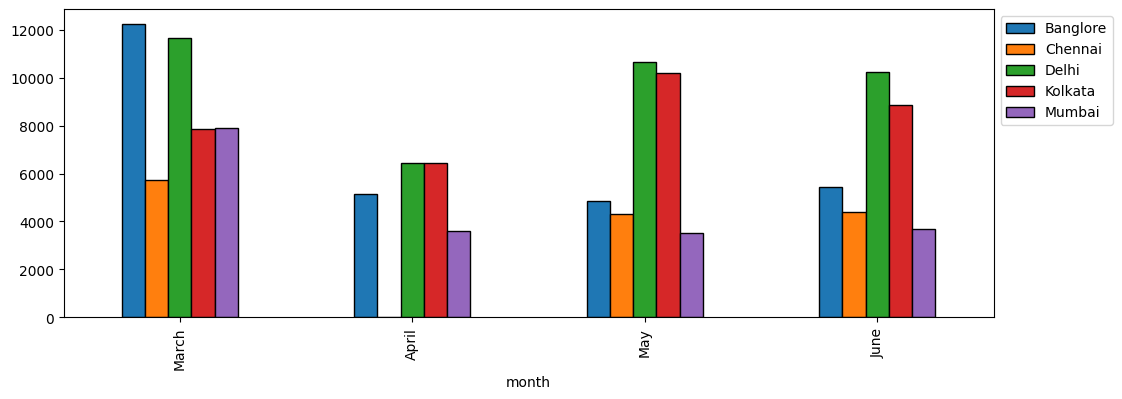

In [100]:
(
	train
	.groupby([pd.Grouper(key="Date_of_Journey", freq="M"), "Source"])["Price"].mean().unstack(fill_value=0).set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)


In [101]:
train["Dep_Time"]

0      2025-02-03 08:55:00
1      2025-02-03 17:30:00
2      2025-02-03 11:40:00
3      2025-02-03 09:25:00
4      2025-02-03 22:55:00
               ...        
6690   2025-02-03 10:45:00
6691   2025-02-03 09:25:00
6692   2025-02-03 14:00:00
6693   2025-02-03 07:55:00
6694   2025-02-03 11:50:00
Name: Dep_Time, Length: 6695, dtype: datetime64[ns]

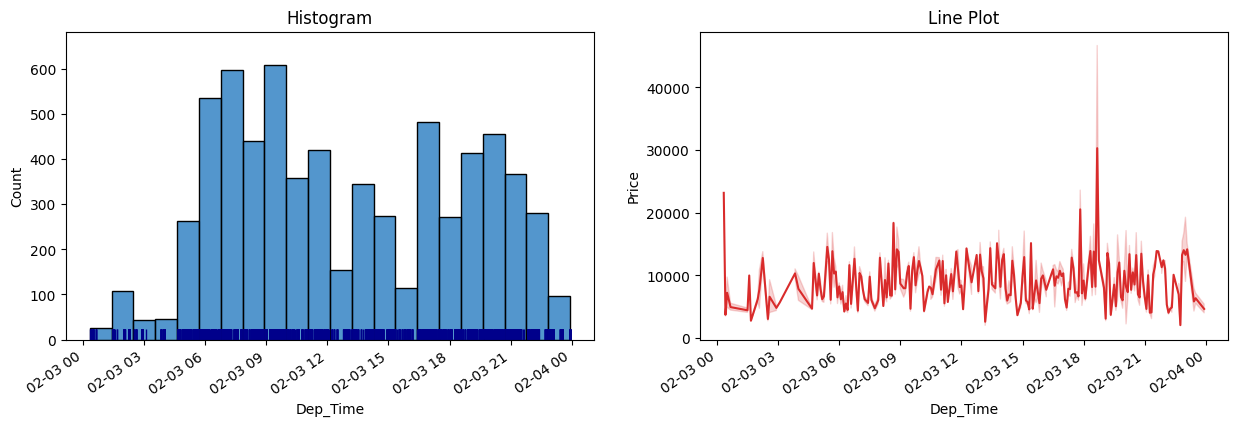

In [103]:
eda_utils.dt_univar_plots(train, "Dep_Time", "Price")

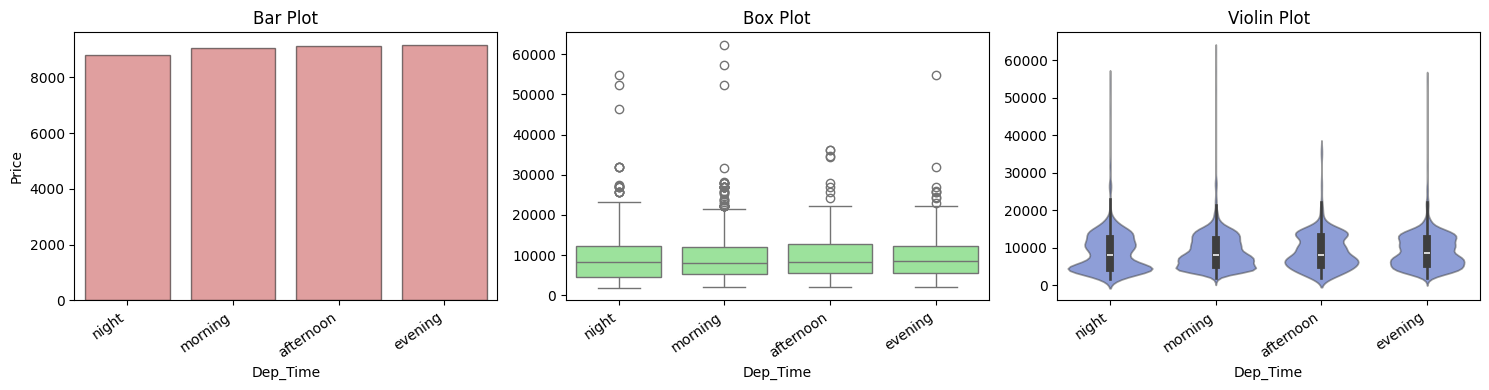

In [104]:
(
	train
	.assign(Dep_Time=lambda df_1: (np.select([df_1["Dep_Time"].dt.hour.between(4, 12, inclusive="left"), df_1["Dep_Time"].dt.hour.between(12, 16, inclusive="left"),
				   df_1["Dep_Time"].dt.hour.between(16, 20, inclusive="left")], ["morning", "afternoon", "evening"], default="night")
	))
	.pipe(eda_utils.num_cat_bivar_plots, "Price", "Dep_Time")
)

In [106]:
train["Duration"]

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: Duration, Length: 6695, dtype: int64

In [107]:
eda_utils.num_summary(train, "Duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: Duration, Length: 6695, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,922.5
90,1440.0
95,1601.5
99,1855.0


,value
mean,633.489171
trimmed mean (5%),599.711299
trimmed mean (10%),571.053761
median,510.000000


,value
var,253015.348516
std,503.006311
IQR,752.500000
mad,340.000000
coef_variance,0.794025


,value
skewness,0.893578
kurtosis,-0.053860


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 7.39934424543729e-57
Test Statistic       : 0.8865693123370929
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.46369663341648
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


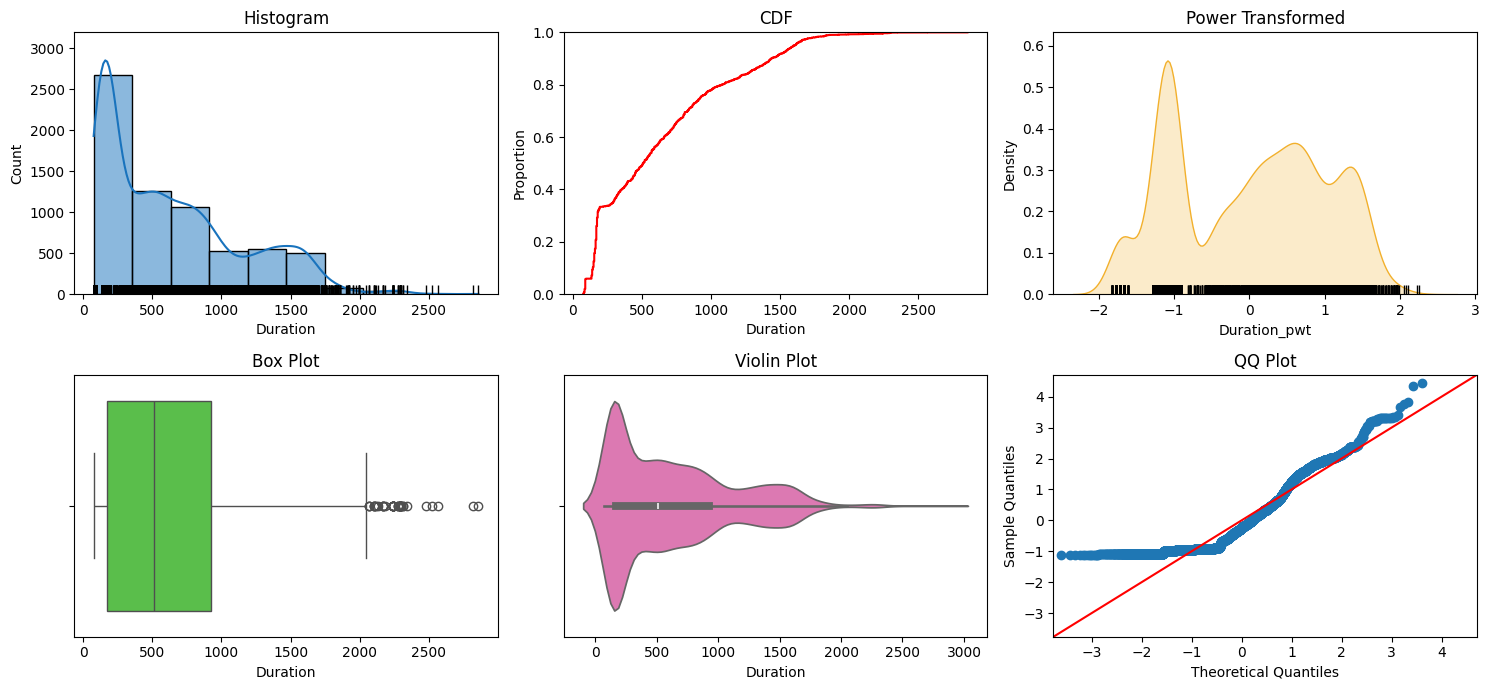

In [108]:
eda_utils.num_univar_plots(train, "Duration")

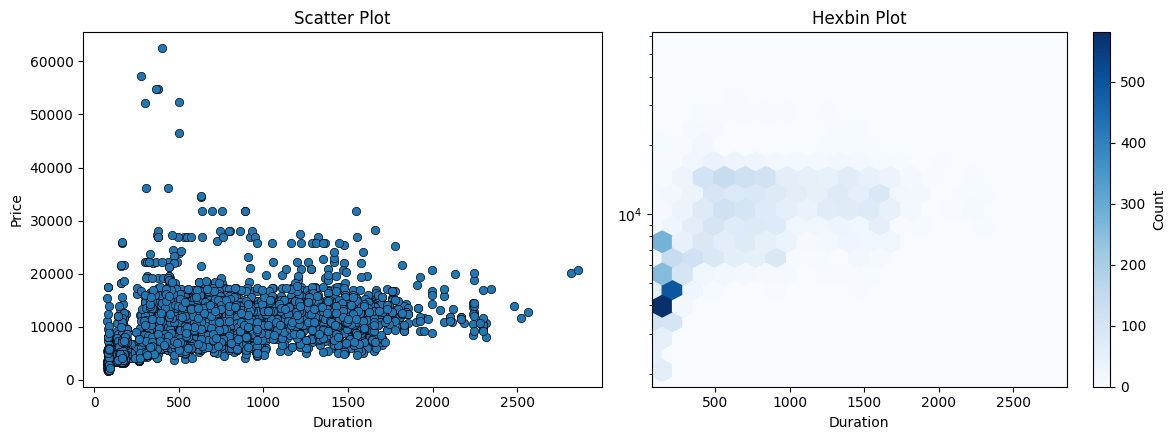

In [110]:
eda_utils.num_bivar_plots(train, "Duration", "Price", hexbin_kwargs=dict(yscale="log", gridsize=20,	cmap="Blues"))

In [111]:
eda_utils.num_num_hyp_testing(train, "Price", "Duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.509012449177902
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Price and Duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6978600816697789
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Price and Duration are correlated


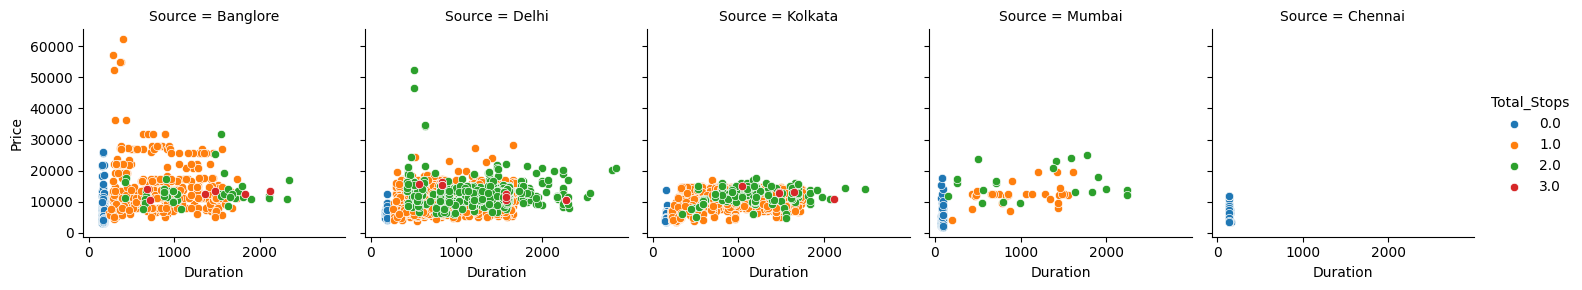

In [114]:
duration_grid = sns.FacetGrid(
	data=train,
	col="Source",
	hue="Total_Stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "Duration", "Price")

duration_grid.add_legend()

In [119]:
print(eda_utils.get_iqr_outliers(train, "Duration"))
print(eda_utils.get_iqr_outliers(train, "Duration").shape)

Lower Limit : -958.75
Upper Limit : 2051.25
          Airline Date_of_Journey    Source Destination            Dep_Time  \
3690    Air India      2019-05-01   Kolkata    Banglore 2025-02-03 05:50:00   
3225  Jet Airways      2019-03-06     Delhi      Cochin 2025-02-03 17:55:00   
6079  Jet Airways      2019-03-06     Delhi      Cochin 2025-02-03 17:55:00   
1517    Air India      2019-03-03  Banglore   New Delhi 2025-02-03 11:05:00   
4589    Air India      2019-03-18  Banglore   New Delhi 2025-02-03 11:05:00   
2990    Air India      2019-03-03  Banglore   New Delhi 2025-02-03 11:05:00   
2916    Air India      2019-05-12   Kolkata    Banglore 2025-02-03 12:00:00   
2170    Air India      2019-03-12  Banglore   New Delhi 2025-02-03 06:45:00   
1105  Jet Airways      2019-03-06     Delhi      Cochin 2025-02-03 16:50:00   
3091    Air India      2019-03-03     Delhi      Cochin 2025-02-03 07:05:00   
4000    Air India      2019-03-06     Delhi      Cochin 2025-02-03 07:05:00   
1630    

Lower Limit : -958.75
Upper Limit : 2051.25
(49, 10)


- Feature Engineering

In [121]:
! pip install feature_engine

In [123]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
	OneHotEncoder,
	OrdinalEncoder,
	StandardScaler,
	MinMaxScaler,
	PowerTransformer,
	FunctionTransformer
)
from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)
import matplotlib.pyplot as plt
import warnings

In [124]:
pd.set_option("display.max_columns", None)
sklearn.set_config(transform_output="pandas")
warnings.filterwarnings("ignore")

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          6695 non-null   object        
 1   Date_of_Journey  6695 non-null   datetime64[ns]
 2   Source           6695 non-null   object        
 3   Destination      6695 non-null   object        
 4   Dep_Time         6695 non-null   datetime64[ns]
 5   Arrival_Time     6695 non-null   datetime64[ns]
 6   Duration         6695 non-null   int64         
 7   Total_Stops      6695 non-null   float64       
 8   Additional_Info  6695 non-null   object        
 9   Price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [126]:
X_train = train.drop(columns="Price")
y_train = train["Price"]

In [127]:
X_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info'],
      dtype='object')

In [128]:
X_train["Airline"]

0       Jet Airways
1       Jet Airways
2             GoAir
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: Airline, Length: 6695, dtype: object

In [129]:
air_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)), #group cat with less than 10% within min 2 cat
	("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

air_transformer.fit_transform(X_train.loc[:, ["Airline"]])

,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
6690,0.0,0.0,1.0,0.0,0.0
6691,1.0,0.0,0.0,0.0,0.0
6692,0.0,0.0,1.0,0.0,0.0
6693,0.0,0.0,0.0,0.0,1.0


In [130]:
X_train["Date_of_Journey"]

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: Date_of_Journey, Length: 6695, dtype: datetime64[ns]

In [133]:
feature_to_extract = ["month", "week", "day_of_week", "day_of_year"]

doj_transformer = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
	("scaler", MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:, ["Date_of_Journey"]])

,Date_of_Journey_month,Date_of_Journey_week,Date_of_Journey_day_of_week,Date_of_Journey_day_of_year
0,0.000000,0.176471,0.500000,0.169492
1,0.000000,0.235294,0.333333,0.220339
2,0.000000,0.058824,0.833333,0.067797
3,1.000000,0.882353,0.333333,0.872881
4,0.000000,0.117647,0.166667,0.093220
...,...,...,...,...
6690,0.000000,0.176471,0.500000,0.169492
6691,0.666667,0.529412,0.333333,0.516949
6692,1.000000,0.764706,0.833333,0.779661
6693,1.000000,1.000000,0.000000,0.974576


In [131]:
X_train["Source"]

0       Banglore
1          Delhi
2       Banglore
3        Kolkata
4       Banglore
          ...   
6690       Delhi
6691     Kolkata
6692       Delhi
6693       Delhi
6694    Banglore
Name: Source, Length: 6695, dtype: object

In [132]:
X_train["Destination"]

0       New Delhi
1          Cochin
2       New Delhi
3        Banglore
4       New Delhi
          ...    
6690       Cochin
6691     Banglore
6692       Cochin
6693       Cochin
6694    New Delhi
Name: Destination, Length: 6695, dtype: object

In [134]:
location_subset = X_train.loc[:, ["Source", "Destination"]]
location_subset

,Source,Destination
0,Banglore,New Delhi
1,Delhi,Cochin
2,Banglore,New Delhi
3,Kolkata,Banglore
4,Banglore,New Delhi
...,...,...
6690,Delhi,Cochin
6691,Kolkata,Banglore
6692,Delhi,Cochin
6693,Delhi,Cochin


In [135]:
location_pipe1 = Pipeline(steps=[
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)), # group less than 10% values to other cat
	("encoder", MeanEncoder()), #calculates avg value for each cat target and encode
	("scaler", PowerTransformer()) #make distribution symmetric
])

location_pipe1.fit_transform(location_subset, y_train)

,Source,Destination
0,-0.857930,-0.736484
1,1.065418,1.061694
2,-0.857930,-0.736484
3,-0.203928,-0.224351
4,-0.857930,-0.736484
...,...,...
6690,1.065418,1.061694
6691,-0.203928,-0.224351
6692,1.065418,1.061694
6693,1.065418,1.061694


In [136]:
X_train["Dep_Time"]

0      2025-02-03 08:55:00
1      2025-02-03 17:30:00
2      2025-02-03 11:40:00
3      2025-02-03 09:25:00
4      2025-02-03 22:55:00
               ...        
6690   2025-02-03 10:45:00
6691   2025-02-03 09:25:00
6692   2025-02-03 14:00:00
6693   2025-02-03 07:55:00
6694   2025-02-03 11:50:00
Name: Dep_Time, Length: 6695, dtype: datetime64[ns]

In [137]:
X_train["Arrival_Time"]

0      2025-02-03 19:10:00
1      2025-02-03 04:25:00
2      2025-02-03 14:35:00
3      2025-02-03 18:30:00
4      2025-02-03 07:40:00
               ...        
6690   2025-02-03 18:50:00
6691   2025-02-03 18:30:00
6692   2025-02-03 19:00:00
6693   2025-02-03 13:25:00
6694   2025-02-03 08:55:00
Name: Arrival_Time, Length: 6695, dtype: datetime64[ns]

In [138]:
time_subset = X_train.loc[:, ["Dep_Time", "Arrival_Time"]]
time_subset

,Dep_Time,Arrival_Time
0,2025-02-03 08:55:00,2025-02-03 19:10:00
1,2025-02-03 17:30:00,2025-02-03 04:25:00
2,2025-02-03 11:40:00,2025-02-03 14:35:00
3,2025-02-03 09:25:00,2025-02-03 18:30:00
4,2025-02-03 22:55:00,2025-02-03 07:40:00
...,...,...
6690,2025-02-03 10:45:00,2025-02-03 18:50:00
6691,2025-02-03 09:25:00,2025-02-03 18:30:00
6692,2025-02-03 14:00:00,2025-02-03 19:00:00
6693,2025-02-03 07:55:00,2025-02-03 13:25:00


In [139]:
time_pipe1 = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=["hour", "minute"])),
	("scaler", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,0.347826,1.000000,0.826087,0.181818
1,0.739130,0.545455,0.173913,0.454545
2,0.478261,0.727273,0.608696,0.636364
3,0.391304,0.454545,0.782609,0.545455
4,0.956522,1.000000,0.304348,0.727273
...,...,...,...,...
6690,0.434783,0.818182,0.782609,0.909091
6691,0.391304,0.454545,0.782609,0.545455
6692,0.608696,0.000000,0.826087,0.000000
6693,0.304348,1.000000,0.565217,0.454545


In [140]:
def part_of_day(X, morning=4, noon=12, eve=16, night=20):
	columns = X.columns.to_list()
	X_temp = X.assign(**{
		col: pd.to_datetime(X.loc[:, col]).dt.hour
		for col in columns
	})

	return (
		X_temp
		.assign(**{
			f"{col}_part_of_day": np.select(
				[X_temp.loc[:, col].between(morning, noon, inclusive="left"),
				 X_temp.loc[:, col].between(noon, eve, inclusive="left"),
				 X_temp.loc[:, col].between(eve, night, inclusive="left")],
				["morning", "afternoon", "evening"],
				default="night"
			)
			for col in columns
		})
		.drop(columns=columns)
	)

FunctionTransformer(func=part_of_day).fit_transform(time_subset)

,Dep_Time_part_of_day,Arrival_Time_part_of_day
0,morning,evening
1,evening,morning
2,morning,afternoon
3,morning,evening
4,night,morning
...,...,...
6690,morning,evening
6691,morning,evening
6692,afternoon,evening
6693,morning,afternoon


In [141]:
time_pipe2 = Pipeline(steps=[
	("part", FunctionTransformer(func=part_of_day)),
	("encoder", CountFrequencyEncoder()),
	("scaler", MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,Dep_Time_part_of_day,Arrival_Time_part_of_day
0,1.000000,0.667335
1,0.202685,0.952906
2,1.000000,0.000000
3,1.000000,0.667335
4,0.174101,0.952906
...,...,...
6690,1.000000,0.667335
6691,1.000000,0.667335
6692,0.000000,0.667335
6693,1.000000,0.000000


In [142]:
time_transformer = FeatureUnion(transformer_list=[
	("part1", time_pipe1),
	("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_part_of_day,Arrival_Time_part_of_day
0,0.347826,1.000000,0.826087,0.181818,1.000000,0.667335
1,0.739130,0.545455,0.173913,0.454545,0.202685,0.952906
2,0.478261,0.727273,0.608696,0.636364,1.000000,0.000000
3,0.391304,0.454545,0.782609,0.545455,1.000000,0.667335
4,0.956522,1.000000,0.304348,0.727273,0.174101,0.952906
...,...,...,...,...,...,...
6690,0.434783,0.818182,0.782609,0.909091,1.000000,0.667335
6691,0.391304,0.454545,0.782609,0.545455,1.000000,0.667335
6692,0.608696,0.000000,0.826087,0.000000,0.000000,0.667335
6693,0.304348,1.000000,0.565217,0.454545,1.000000,0.000000


In [144]:
X_train["Duration"]

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: Duration, Length: 6695, dtype: int64

In [145]:
(
	X_train["Duration"]	
	.quantile([0.25, 0.5, 0.75])
	.values
	.reshape(-1, 1)
	)

array([[170. ],
       [510. ],
       [922.5]])

In [146]:
# It selects numerical columns (if no specific columns are provided).
# It calculates percentile values (e.g., 25th, 50th, and 75th percentiles) for each selected column.
# It computes the similarity between each value in the dataset and these percentiles using the RBF kernel function.
# It outputs new transformed features that represent the similarity of each original feature to these percentile values.

class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)

In [147]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(X_train)

,Duration_rbf_40,Duration_rbf_80,Total_Stops_rbf_40,Total_Stops_rbf_80
0,0.000000e+00,0.0,1.000000,1.000000
1,0.000000e+00,0.0,1.000000,1.000000
2,0.000000e+00,0.0,0.904837,0.904837
3,0.000000e+00,0.0,1.000000,1.000000
4,0.000000e+00,0.0,1.000000,1.000000
...,...,...,...,...
6690,0.000000e+00,0.0,0.904837,0.904837
6691,0.000000e+00,0.0,1.000000,1.000000
6692,4.225900e-132,0.0,1.000000,1.000000
6693,7.187782e-28,0.0,1.000000,1.000000


In [153]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X["Duration"].lt(short),
									    X["Duration"].between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="Duration")
	)

In [154]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X["Duration"].ge(value).astype(int)
		})
		.drop(columns="Duration")
	)

In [155]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ["Duration"]])

,Duration_rbf_25,Duration_rbf_50,Duration_rbf_75,duration_cat,duration_over_1000,Duration
0,-0.364262,-0.107976,-0.107799,2.0,0,-0.033916
1,-0.364262,-0.107976,-0.107799,2.0,0,0.046422
2,2.373008,-0.107976,-0.107799,0.0,0,-0.917631
3,-0.364262,-0.107976,-0.107799,2.0,0,-0.174507
4,-0.364262,-0.107975,-0.107799,2.0,0,-0.214676
...,...,...,...,...,...,...
6690,-0.364262,-0.107976,-0.107799,2.0,1,2.597145
6691,-0.364262,-0.107976,-0.107799,2.0,0,-0.174507
6692,-0.364262,-0.107976,-0.107799,1.0,0,-0.666576
6693,-0.364262,-0.107976,-0.107799,1.0,0,-0.606322


In [156]:
X_train["Total_Stops"]

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
6690    2.0
6691    1.0
6692    1.0
6693    1.0
6694    1.0
Name: Total_Stops, Length: 6695, dtype: float64

In [157]:
def is_direct(X):
	return X.assign(is_direct_flight=X["Total_Stops"].eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["Total_Stops"]])

,Total_Stops,is_direct_flight
0,1.0,0
1,1.0,0
2,0.0,1
3,1.0,0
4,1.0,0
...,...,...
6690,2.0,0
6691,1.0,0
6692,1.0,0
6693,1.0,0


In [158]:
X_train["Additional_Info"]

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: Additional_Info, Length: 6695, dtype: object

In [159]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["Additional_Info"]])

,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_Other
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
6690,0.0,1.0,0.0
6691,0.0,1.0,0.0
6692,1.0,0.0,0.0
6693,0.0,1.0,0.0


In [166]:
def have_info(X):
	return X.assign(additional_info=X["Additional_Info"].ne("No Info").astype(int))

In [167]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [168]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["Additional_Info"]])

,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_Other,Additional_Info,additional_info
0,1.0,0.0,0.0,In-flight meal not included,1
1,1.0,0.0,0.0,In-flight meal not included,1
2,0.0,1.0,0.0,No Info,0
3,0.0,1.0,0.0,No Info,0
4,1.0,0.0,0.0,In-flight meal not included,1
...,...,...,...,...,...
6690,0.0,1.0,0.0,No Info,0
6691,0.0,1.0,0.0,No Info,0
6692,1.0,0.0,0.0,In-flight meal not included,1
6693,0.0,1.0,0.0,No Info,0


In [170]:
column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["Airline"]),
	("doj", doj_transformer, ["Date_of_Journey"]),
	("location", location_pipe1, ["Source", 'Destination']),
	("time", time_transformer, ["Dep_Time", "Arrival_Time"]),
	("dur", duration_transformer, ["Duration"]),
	("stops", total_stops_transformer, ["Total_Stops"]),
	("info", info_transformer, ["Additional_Info"])
], remainder="passthrough")

column_transformer.fit_transform(X_train, y_train)

,air__Airline_Air India,air__Airline_IndiGo,air__Airline_Jet Airways,air__Airline_Multiple carriers,air__Airline_Other,doj__Date_of_Journey_month,doj__Date_of_Journey_week,doj__Date_of_Journey_day_of_week,doj__Date_of_Journey_day_of_year,location__Source,location__Destination,time__Dep_Time_hour,time__Dep_Time_minute,time__Arrival_Time_hour,time__Arrival_Time_minute,time__Dep_Time_part_of_day,time__Arrival_Time_part_of_day,dur__Duration_rbf_25,dur__Duration_rbf_50,dur__Duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__Duration,stops__Total_Stops,stops__is_direct_flight,info__Additional_Info_In-flight meal not included,info__Additional_Info_No Info,info__Additional_Info_Other,info__Additional_Info,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,0.000000,0.176471,0.500000,0.169492,-0.857930,-0.736484,0.347826,1.000000,0.826087,0.181818,1.000000,0.667335,-0.364262,-0.107976,-0.107799,2.0,0,-0.033916,1.0,0,1.0,0.0,0.0,In-flight meal not included,1
1,0.0,0.0,1.0,0.0,0.0,0.000000,0.235294,0.333333,0.220339,1.065418,1.061694,0.739130,0.545455,0.173913,0.454545,0.202685,0.952906,-0.364262,-0.107976,-0.107799,2.0,0,0.046422,1.0,0,1.0,0.0,0.0,In-flight meal not included,1
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.058824,0.833333,0.067797,-0.857930,-0.736484,0.478261,0.727273,0.608696,0.636364,1.000000,0.000000,2.373008,-0.107976,-0.107799,0.0,0,-0.917631,0.0,1,0.0,1.0,0.0,No Info,0
3,1.0,0.0,0.0,0.0,0.0,1.000000,0.882353,0.333333,0.872881,-0.203928,-0.224351,0.391304,0.454545,0.782609,0.545455,1.000000,0.667335,-0.364262,-0.107976,-0.107799,2.0,0,-0.174507,1.0,0,0.0,1.0,0.0,No Info,0
4,0.0,0.0,1.0,0.0,0.0,0.000000,0.117647,0.166667,0.093220,-0.857930,-0.736484,0.956522,1.000000,0.304348,0.727273,0.174101,0.952906,-0.364262,-0.107975,-0.107799,2.0,0,-0.214676,1.0,0,1.0,0.0,0.0,In-flight meal not included,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,0.0,0.0,1.0,0.0,0.0,0.000000,0.176471,0.500000,0.169492,1.065418,1.061694,0.434783,0.818182,0.782609,0.909091,1.000000,0.667335,-0.364262,-0.107976,-0.107799,2.0,1,2.597145,2.0,0,0.0,1.0,0.0,No Info,0
6691,1.0,0.0,0.0,0.0,0.0,0.666667,0.529412,0.333333,0.516949,-0.203928,-0.224351,0.391304,0.454545,0.782609,0.545455,1.000000,0.667335,-0.364262,-0.107976,-0.107799,2.0,0,-0.174507,1.0,0,0.0,1.0,0.0,No Info,0
6692,0.0,0.0,1.0,0.0,0.0,1.000000,0.764706,0.833333,0.779661,1.065418,1.061694,0.608696,0.000000,0.826087,0.000000,0.000000,0.667335,-0.364262,-0.107976,-0.107799,1.0,0,-0.666576,1.0,0,1.0,0.0,0.0,In-flight meal not included,1
6693,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,0.000000,0.974576,1.065418,1.061694,0.304348,1.000000,0.565217,0.454545,1.000000,0.000000,-0.364262,-0.107976,-0.107799,1.0,0,-0.606322,1.0,0,0.0,1.0,0.0,No Info,0


In [171]:
# applies randomforest to find the best features. The unrelevant features will get dropped.
# fits RF between each feature and the target variable. Features R2 values below 0.1 will get dropped while the others are retained

estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
) 

In [172]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(X_train, y_train)

,air__Airline_IndiGo,air__Airline_Jet Airways,air__Airline_Other,doj__Date_of_Journey_week,doj__Date_of_Journey_day_of_year,location__Source,location__Destination,dur__Duration_rbf_25,dur__duration_cat,dur__duration_over_1000,dur__Duration,stops__Total_Stops,stops__is_direct_flight,info__Additional_Info
0,0.0,1.0,0.0,0.176471,0.169492,-0.857930,-0.736484,-0.364262,2.0,0,-0.033916,1.0,0,In-flight meal not included
1,0.0,1.0,0.0,0.235294,0.220339,1.065418,1.061694,-0.364262,2.0,0,0.046422,1.0,0,In-flight meal not included
2,0.0,0.0,1.0,0.058824,0.067797,-0.857930,-0.736484,2.373008,0.0,0,-0.917631,0.0,1,No Info
3,0.0,0.0,0.0,0.882353,0.872881,-0.203928,-0.224351,-0.364262,2.0,0,-0.174507,1.0,0,No Info
4,0.0,1.0,0.0,0.117647,0.093220,-0.857930,-0.736484,-0.364262,2.0,0,-0.214676,1.0,0,In-flight meal not included
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,0.0,1.0,0.0,0.176471,0.169492,1.065418,1.061694,-0.364262,2.0,1,2.597145,2.0,0,No Info
6691,0.0,0.0,0.0,0.529412,0.516949,-0.203928,-0.224351,-0.364262,2.0,0,-0.174507,1.0,0,No Info
6692,0.0,1.0,0.0,0.764706,0.779661,1.065418,1.061694,-0.364262,1.0,0,-0.666576,1.0,0,In-flight meal not included
6693,0.0,0.0,1.0,1.000000,0.974576,1.065418,1.061694,-0.364262,1.0,0,-0.606322,1.0,0,No Info
